In [32]:
import pickle as pk
from scipy.stats import ks_2samp
from glob import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/yoavfreund/miniforge3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['select']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [2]:
pkl_file=open('DK43.pkl','rb')
Dnames=pk.load(pkl_file)
Dnames.keys()

dict_keys(['Background', '3D boxes', 'Boxes locations', 'Feature names'])

In [3]:
Back=Dnames['Background']
names=Dnames['Feature names']
Back.shape, len(names)

((20, 2000), 20)

In [5]:
data_dir='/Users/yoavfreund/projects/statistical_significance_data/DK39/'

For DK39, 93 files and a total of 433440 boxes, 67632840 cells

In [27]:
cdfs=[]
box_locations=[]
i=0
for file in glob(data_dir+'*.pkl'):
    print('\r%d,'%i,end=''); i+=1
    pkl_file=open(file,'rb')
    D=pk.load(pkl_file)
    cdfs+=D['Box cdfs']
    box_locations+=D['Box locations']

92,

In [29]:
len (box_locations),len(cdfs)

(433440, 433440)

In [36]:
box_loc=concatenate(box_locations)
box_loc[:5,:]

array([[2310.8890848 ,  587.34453522, 3741.58212364],
       [2646.87305699,  648.45730847, 3727.10946308],
       [2758.86771439,  668.82823289, 3722.28524289],
       [2870.86237179,  689.1991573 , 3717.4610227 ],
       [3206.84634398,  750.31193055, 3702.98836213]])

In [83]:
box_loc.shape

(433440, 3)

In [49]:
diff = box_loc[1:,:] - box_loc[:-1,:]
diff=np.round(diff*1)/1
diff_dict={}
for i in range(diff.shape[0]):
    if(i %1000==0):
        print('\r%d,'%i,end='')
    v=tuple(diff[i,:])
    if v in diff_dict:
        diff_dict[v]+=1
    else:
        diff_dict[v]=1

433000,

In [9]:
_all=concatenate(cdfs,axis=1)

In [60]:
_all.shape

(20, 67632840)

In [11]:
l=_all.shape[1]
p=3000./l
select=np.random.choice([0, 1], size=(l,), p=[1-p, p])

In [12]:
_sample=_all[:,select==1]
_sample.shape

(20, 3087)

In [13]:
def plot_CDF(cdf,label):
    cdf=np.sort(cdf)
    P=arange(0,1,1/cdf.shape[0])
    plot(cdf,P,label=label);

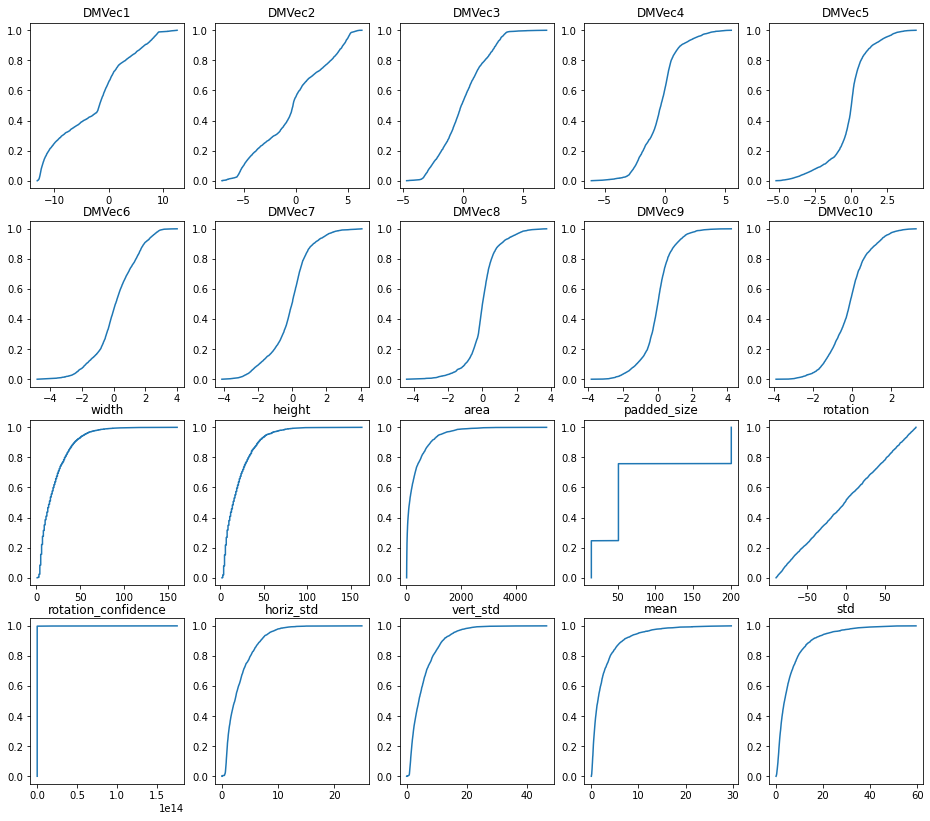

In [61]:
figure(figsize=[16,14])
for i in range(20):
    subplot(4,5,i+1)
    plot_CDF(_sample[i,:],names[i]);
    title(names[i])

In [62]:
#analyze number of cells per box.
L=[]
for CDF in cdfs:
    L.append(CDF.shape[1])
len(L),max(L),sum(L)

(433440, 678, 67632840)

In [85]:
mean(L),std(L)

(156.03737541528238, 81.30659304183506)

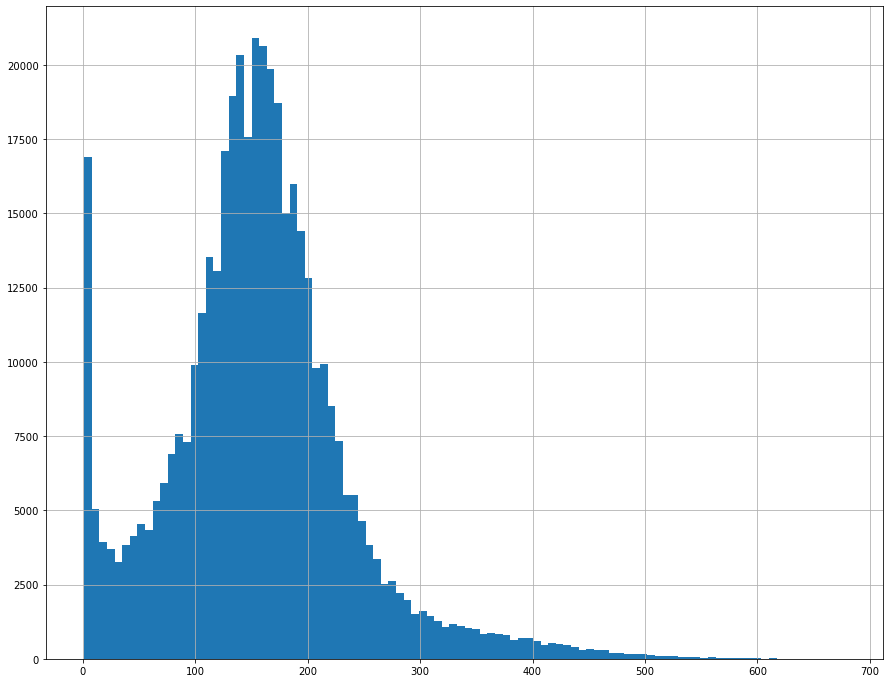

In [86]:
figure(figsize=[15,12])
hist(L,bins=100);
grid()

In [64]:
from scipy.stats import ks_2samp

In [66]:
cdfs[500].shape

(20, 238)

In [69]:
def calc_cdf_max_diff(cdf1,cdf2):
    l=cdf1.shape[0]
    ones=np.ones(l)/l
    combined1=np.stack([cdf1,ones],axis=1)

    l=cdf2.shape[0]
    ones=-np.ones(l)/l
    combined2=np.stack([cdf2,ones],axis=1)

    full=np.concatenate([combined1,combined2])
    sorted_full = full[np.argsort(full[:, 0])]
    cumulative=cumsum(sorted_full[:,1])
    _argmax=argmax(abs(cumulative))
    _max=cumulative[_argmax]
    _max_val=sorted_full[_argmax,0]
    return _max,_max_val,sorted_full[:,0],cumulative

In [87]:
for i in range(500,800): #len(D['3D boxes'])):
    Fore=cdfs[i]
    for j in range(20):
        cdf1=Fore[j,:]
        cdf2=Back[j,:]
        pval=ks_2samp(cdf1,cdf2).pvalue
        if(pval<0.001):
            if names[j]!='rotation': # in ['mean','std']:
                continue
            pval_to_next=ks_2samp(cdfs[i][j,:],cdfs[i+1][j,:]).pvalue
            pval_next = ks_2samp(cdfs[i+1][j,:],Back[j,:]).pvalue
            if pval_next>0.001 or pval_to_next<.1:
                continue
            print("%3d %20s: pval=%5.0g, pval_to_next=%5.0g, pval_next=%5.0g"%(i,names[j],pval,pval_to_next,pval_next))

570             rotation: pval=3e-06, pval_to_next=  0.9, pval_next=6e-05
586             rotation: pval=1e-08, pval_to_next=    1, pval_next=5e-11
594             rotation: pval=5e-06, pval_to_next=  0.5, pval_next=9e-05
595             rotation: pval=9e-05, pval_to_next=  0.8, pval_next=0.0001
596             rotation: pval=0.0001, pval_to_next=  0.5, pval_next=0.0005
636             rotation: pval=1e-07, pval_to_next=  0.6, pval_next=3e-07
637             rotation: pval=3e-07, pval_to_next=  0.7, pval_next=2e-06
672             rotation: pval=5e-05, pval_to_next=  0.7, pval_next=6e-05
689             rotation: pval=2e-07, pval_to_next=  0.5, pval_next=5e-05
767             rotation: pval=0.0008, pval_to_next=  0.3, pval_next=0.0004
778             rotation: pval=1e-10, pval_to_next=  0.1, pval_next=0.0008
779             rotation: pval=0.0008, pval_to_next=  0.1, pval_next=5e-08
780             rotation: pval=5e-08, pval_to_next=  0.5, pval_next=6e-06
782             rotation: pval=

### Suggested Heuristics
Connect neighboring boxes if there is a feature on which both are significantly different from the background, but not significantly different from each other.

2 KstestResult(statistic=0.23638372093023255, pvalue=1.9507849672306676e-06)
6 KstestResult(statistic=0.2478450704225352, pvalue=1.1717176795489337e-07)
7 KstestResult(statistic=0.349324427480916, pvalue=6.80566714095221e-14)


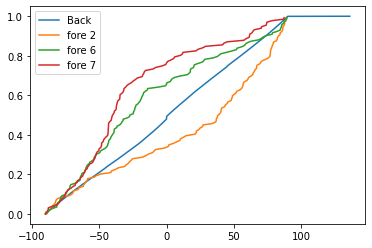

In [181]:
feature=14
plot_CDF(Back[feature,:], 'Back')
for i in range(10): #len(D['3D boxes'])):
    Fore=D['3D boxes'][i]
    ks=ks_2samp(Fore[feature,:],Back[feature,:])
    pval=ks.pvalue
    if pval<0.00001:
        print(i,ks)
        plot_CDF(Fore[feature,:], 'fore '+str(i))
        legend()


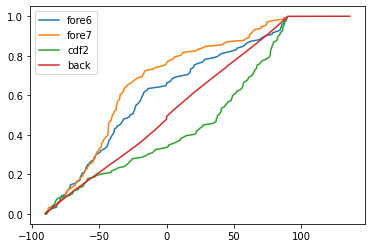

In [188]:
Fore=D['3D boxes'][6]
cdf6=Fore[feature,:]
Fore=D['3D boxes'][7]
cdf7=Fore[feature,:]
Fore=D['3D boxes'][2]
cdf2=Fore[feature,:]
cdfb=Back[feature,:]
plot_CDF(cdf6,'fore6')
plot_CDF(cdf7,'fore7')
plot_CDF(cdf2,'cdf2')
plot_CDF(cdfb,'back')
legend()

In [185]:
_max,_max_val,vals,cumulative = calc_cdf_max_diff(cdf7,cdf2)
_max,_max_val

(0.2478450704225346, -14.034825726526533)

In [190]:
ks_2samp(cdfb,cdf6),ks_2samp(cdfb,cdf7),ks_2samp(cdf7,cdf6),

(KstestResult(statistic=0.2478450704225352, pvalue=1.1717176795489337e-07),
 KstestResult(statistic=0.349324427480916, pvalue=6.80566714095221e-14),
 KstestResult(statistic=0.17234705945597248, pvalue=0.029649968840397056))

(0.2478450704225346, 1.1717176795489337e-07)

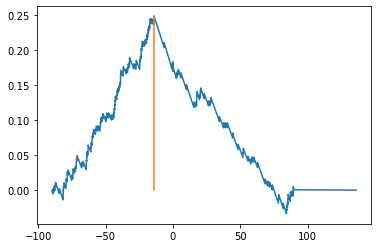

In [173]:
plot(vals,cumulative)
plot([_max_val,_max_val],[0,_max])
_max,pval

In [125]:
_max=argmax(cumulative)
sorted_full[_max,0]

-11.395167831485042

### distribution of cell counts

In [194]:
boxes=D['3D boxes']
sizes=[]
for box in boxes:
    sizes.append(box.shape[1])
len(sizes)
                 

2085

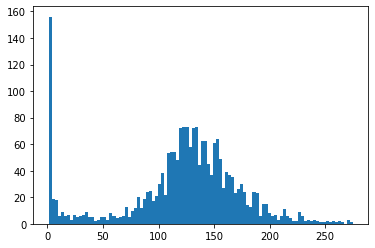

In [196]:
hist(sizes,bins=100);

In [198]:
sizes=array(sizes)
sizes50 = sizes[sizes>50]

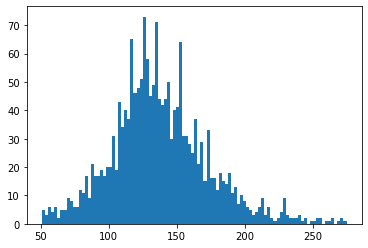

In [199]:
hist(sizes50,bins=100);

In [200]:
mean(sizes50), std(sizes50)

(137.80741560597676, 35.68252205189376)